# Boston housing data
1.  CRIM      per capita crime rate by town
2.  ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3.  INDUS     proportion of non-retail business acres per town
4.  CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5.  NOX       nitric oxides concentration (parts per 10 million)
6.  RM        average number of rooms per dwelling
7.  AGE       proportion of owner-occupied units built prior to 1940
8.  DIS       weighted distances to five Boston employment centres
9.  RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

## Julia
- Install julia from  https://julialang.org/downloads/
- To add packages, switch to package mode by typing `]`, then `add <package>`
- Reopen vscode and select Julia kernel
- Can activate environment using `activate home_project` and this will create Project and Manifest files

In [13]:
# setup environment using toml files in current directory
cd(@__DIR__)
using Pkg
Pkg.activate(".")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.build("Plots")
Pkg.add("PyPlot")
Pkg.add("Distributions")
# Pkg.add("Blink")
Pkg.add("StatsPlots")
Pkg.add("StatsBase")
Pkg.add("GR")
Pkg.add("CSV")
Pkg.add("Downloads")



  Activating environment at `~/julia/Project.toml`
   Resolving package versions...
  No Changes to `~/julia/Project.toml`
  No Changes to `~/julia/Manifest.toml`
   Resolving package versions...
  No Changes to `~/julia/Project.toml`
  No Changes to `~/julia/Manifest.toml`
    Building GR → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/9f473cdf6e2eb360c576f9822e7c765dd9d26dbc/build.log`
   Resolving package versions...
  No Changes to `~/julia/Project.toml`
  No Changes to `~/julia/Manifest.toml`
   Resolving package versions...
  No Changes to `~/julia/Project.toml`
  No Changes to `~/julia/Manifest.toml`
   Resolving package versions...
  No Changes to `~/julia/Project.toml`
  No Changes to `~/julia/Manifest.toml`
   Resolving package versions...
  No Changes to `~/julia/Project.toml`
  No Changes to `~/julia/Manifest.toml`
   Resolving package versions...
  No Changes to `~/julia/Project.toml`
  No Changes to `~/julia/Manifest.toml`
   Resolving package versions...
 

1.1 Download dataset

In [5]:
using Downloads

function f()    
    if isfile("housing.data") == false
        Downloads.download("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data","./data/housing.data")
        Downloads.download("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names","./data/housing.names")
    end
end

f()

"./data/housing.names"

1.2 Compute and verify hash of downloaded file


In [7]:
using SHA

expected = bytes2hex([0xad, 0xfa, 0x6b, 0x6d, 0xca,
0x24, 0xa6, 0x3f, 0xe1, 0x66,
0xa9, 0xe7, 0xfa, 0x01, 0xce,
0xe4, 0x33, 0x58, 0x57, 0xd1])

#open downloaded file and compute hash
open("./data/housing.data") do f
    result = bytes2hex(sha1(f))
    println("hash match: ", result == expected, " = ", result)    
end

hash match: true = adfa6b6dca24a63fe166a9e7fa01cee4335857d1


1.3 Loading data into dataframe: https://github.com/bkamins/
Julia-DataFrames-Tutorial

In [8]:
# need to install DataFrames package for the following
ENV["COLUMNS"]= 200
using DataFrames, Random, DelimitedFiles, CSV

#df = DataFrame(readdlm("housing.data"), [:CRIM,:ZN,:INDUS,:CHAS,:NOX,:RM,:AGE,:DIS,:RAD,:TAX,:PTRATIO,:B,:LSTAT,:MEDV])
df = CSV.read("./data/housing.data", DataFrame; header=[:CRIM,:ZN,:INDUS,:CHAS,:NOX,:RM,:AGE,:DIS,:RAD,:TAX,:PTRATIO,:B,:LSTAT,:MEDV], 
    ignorerepeated=true,delim=' ', threaded=false, tasks=1)



,CRIM,ZN,INDUS,CHAS,NOX,RM
,Float64,Float64,Float64,Int64,Float64,Float64
1,0.00632,18.0,2.31,0,0.538,6.575
2,0.02731,0.0,7.07,0,0.469,6.421
3,0.02729,0.0,7.07,0,0.469,7.185
4,0.03237,0.0,2.18,0,0.458,6.998
5,0.06905,0.0,2.18,0,0.458,7.147
6,0.02985,0.0,2.18,0,0.458,6.43
7,0.08829,12.5,7.87,0,0.524,6.012
8,0.14455,12.5,7.87,0,0.524,6.172
9,0.21124,12.5,7.87,0,0.524,5.631


1.4. Variable characterisitics
- Nominal variables
    - CHAS
- Continuous are the rest

In [24]:
names(df)
nominal_vars = names(df, Int64)
continuous_vars = names(df, Float64)

println(nominal_vars)
println(continous_vars)

["CHAS", "RAD"]
["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]


In [ ]:
#plot(df.MEDV)
hist(col) =
    histogram(df[!,col], title=col)

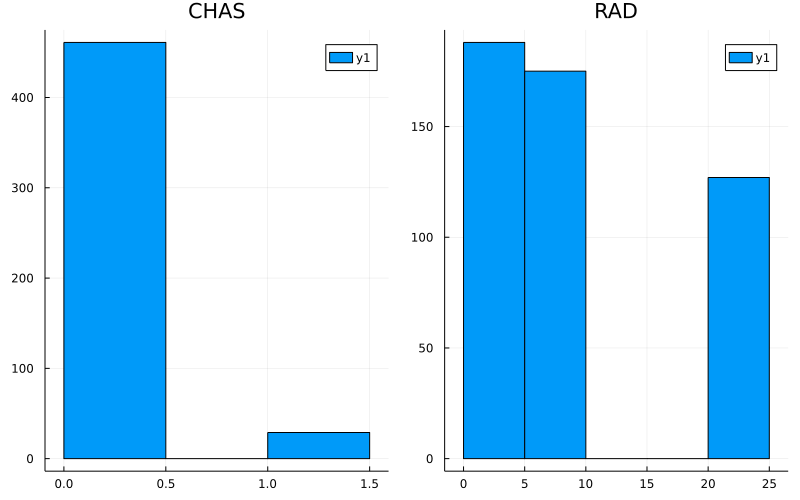

In [33]:
# histogram nominal
plot(map(x -> hist(x), nominal_vars)..., layout=grid(1, 2), size=(800,500))

1.6 Distribution of continous variables

   Resolving package versions...
  No Changes to `~/julia/Project.toml`
  No Changes to `~/julia/Manifest.toml`


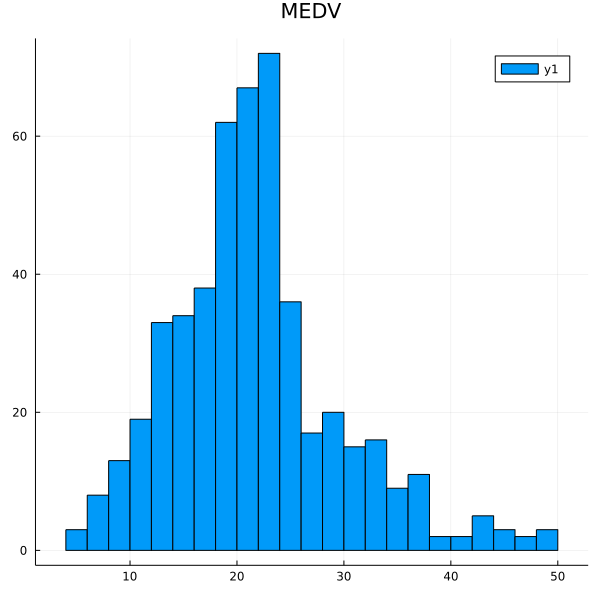

In [29]:
Pkg.add("Distributions")
using Distributions



hist("MEDV")

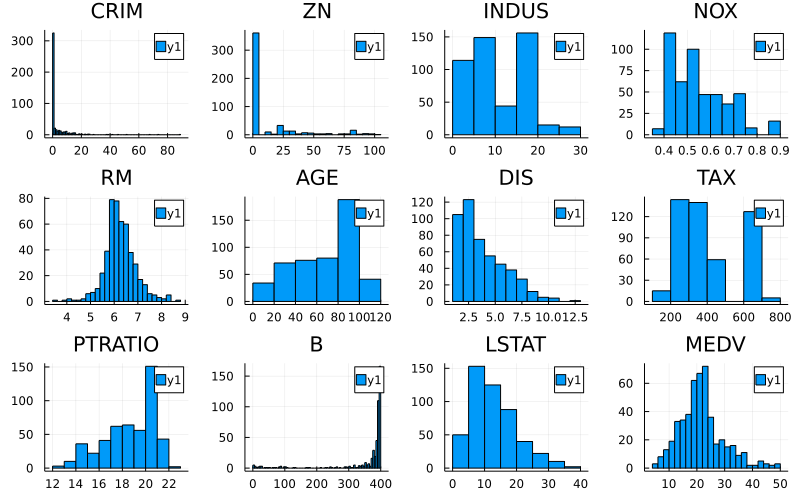

In [30]:
plot(map(x -> hist(x), continous_vars)..., layout=grid(3, 4), size=(800,500))

1.7 Remove MEDV where = 50

In [31]:
df = filter(row -> !(row.MEDV == 50 ),  df)

,CRIM,ZN,INDUS,CHAS,NOX,RM
,Float64,Float64,Float64,Int64,Float64,Float64
1,0.00632,18.0,2.31,0,0.538,6.575
2,0.02731,0.0,7.07,0,0.469,6.421
3,0.02729,0.0,7.07,0,0.469,7.185
4,0.03237,0.0,2.18,0,0.458,6.998
5,0.06905,0.0,2.18,0,0.458,7.147
6,0.02985,0.0,2.18,0,0.458,6.43
7,0.08829,12.5,7.87,0,0.524,6.012
8,0.14455,12.5,7.87,0,0.524,6.172
9,0.21124,12.5,7.87,0,0.524,5.631


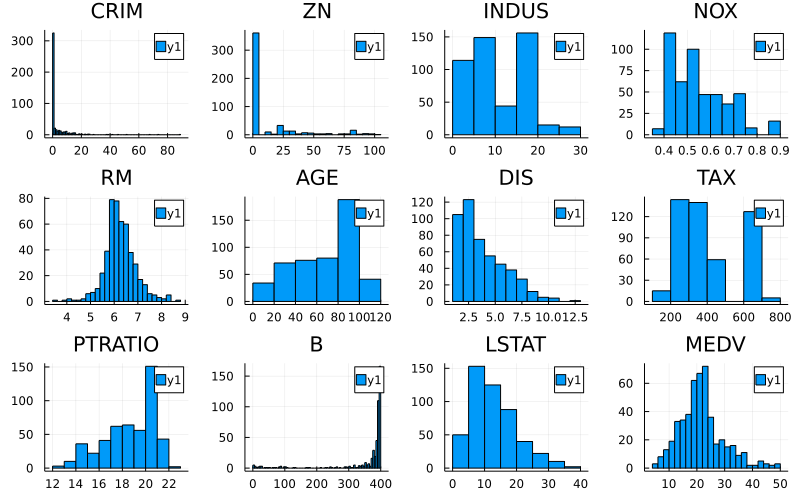

In [32]:
plot(map(x -> hist(x), continous_vars)..., layout=grid(3, 4), size=(800,500))

1.8 Kendalls's Tau correlation

In [37]:
using StatsPlots
gr(size=(600,600))

using StatsBase
housing_cor = corkendall(Matrix(df))